In [1]:
import keras
import tensorflow as tf

In [2]:
gpus = tf.config.experimental.list_physical_devices ('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth (gpu, True)

In [3]:
import os
import cv2

dataset_path = './dataset'
for digit in os.listdir (dataset_path):
    if digit[0] == '.': continue
    for image in os.listdir (os.path.join (dataset_path, digit)):
        image_path = os.path.join (dataset_path, digit, image)
        if digit[0] == '.': continue
        try:
            cv2.imread (image_path)
        except Exception as e:
            os.remove (image_path)


In [35]:
dataset = keras.preprocessing.image_dataset_from_directory (
    dataset_path,
    image_size=(75, 100)
)

Found 35500 files belonging to 35 classes.


In [5]:
dataset = dataset.map (lambda x, y: (x / 255, y))

In [6]:
batch = dataset.as_numpy_iterator ().next ()

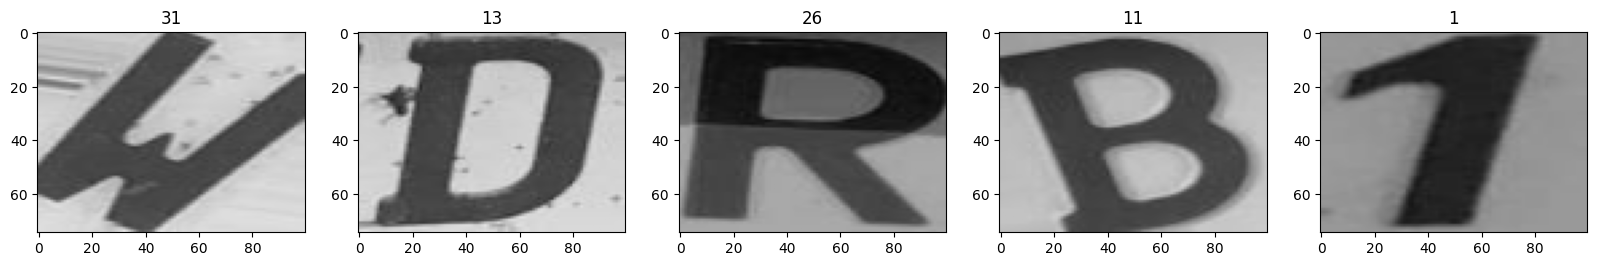

In [7]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots (ncols=5, figsize=(20, 20))
for idx, image in enumerate (batch[0][:5]):
    ax[idx].imshow (image)
    ax[idx].title.set_text (batch[1][idx])

In [8]:
batch[0].min (), batch[0].max ()

(0.032516375, 0.92238563)

In [9]:
len (dataset)

1110

In [10]:
train_size = int (len (dataset) * 0.8)
val_size = int (len (dataset) * 0.2)

In [11]:
train = dataset.take (train_size)
val = dataset.skip (train_size).take (val_size)

In [12]:
X_train, y_train = train.as_numpy_iterator ().next ()
X_test, y_test = val.as_numpy_iterator ().next ()

In [30]:
from keras.models import Sequential
from keras.optimizers.legacy import Adam
from keras.losses import sparse_categorical_crossentropy
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential ([
    Conv2D (16, 3, padding='same', activation='relu', input_shape=(75, 100, 3)),
    MaxPooling2D (),
    Conv2D (32, 3, padding='same', activation='relu'),
    MaxPooling2D (),
    Flatten (),
    Dense (128, activation='relu'),
    Dense (35, activation='softmax')
])

model.compile (
    Adam (learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
results = model.fit (
    train,
    epochs=5,
    validation_data=val)


Epoch 1/5
888/888 [==============================] - 20s 21ms/step - loss: 1.2549 - accuracy: 0.6717 - val_loss: 0.4004 - val_accuracy: 0.8886
Epoch 2/5
888/888 [==============================] - 19s 21ms/step - loss: 0.2915 - accuracy: 0.9190 - val_loss: 0.2406 - val_accuracy: 0.9321
Epoch 3/5
888/888 [==============================] - 17s 19ms/step - loss: 0.1574 - accuracy: 0.9590 - val_loss: 0.1528 - val_accuracy: 0.9571
Epoch 4/5
888/888 [==============================] - 18s 20ms/step - loss: 0.0994 - accuracy: 0.9750 - val_loss: 0.0874 - val_accuracy: 0.9794
Epoch 5/5
888/888 [==============================] - 18s 20ms/step - loss: 0.0641 - accuracy: 0.9834 - val_loss: 0.0625 - val_accuracy: 0.9853


In [32]:
model.save ('models/number_plate6.h5')

/Users/gsnmithra/miniforge3/envs/mlp/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
model.evaluate (X_test, y_test)

1/1 [==============================] - 0s 30ms/step - loss: 0.0146 - accuracy: 1.0000


[0.01461700163781643, 1.0]

In [36]:
# import pickle

classify_output = dict ()
curr_class = 0
for class_name in dataset.class_names:
    classify_output[curr_class] = class_name
    curr_class += 1

# with open ('./models/class_names.pkl', 'wb') as f:
#     pickle.dump (classify_output, f)

In [37]:
from keras.models import load_model

best_model = os.listdir ('models')[-1]
number_letter_model = load_model (os.path.join ('models', best_model))

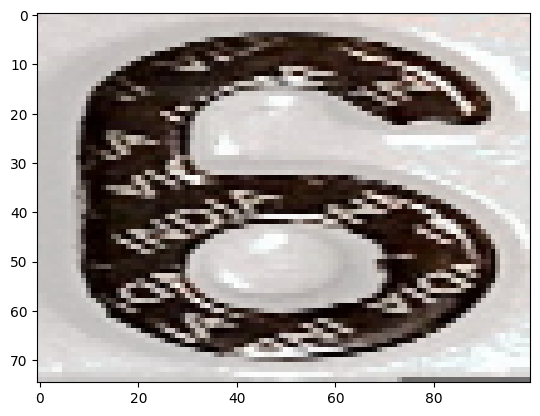

In [40]:
image_path = '6_test.jpg'
testing_image = tf.image.resize (cv2.imread (image_path), (75, 100))
plt.imshow (testing_image / 255)

In [41]:
# testing_image.shape
import numpy as np
classify_output[np.argmax (number_letter_model.predict (np.expand_dims (testing_image, 0)))]

1/1 [==============================] - 0s 185ms/step


'6'